In [1]:
import numpy as np
import csv
import glob
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
#inline
plt.rcParams['figure.figsize'] = [14, 8]

from os import listdir
        
# content = content.decode('utf-8')         



# test_data = np.genfromtxt('./data_export_cobercat/data_export_1-2015.csv',skip_header=1,delimiter=',', dtype=None, names=['timestamp','date','lat','lng','signal_inst','signal_min','signal_max','signal_avg','carrier','fullCarrier','status','net','net_type','lac','cid','psc','speed,satellites','precision1','provider','activity','incident','downloadSpeed','uploadSpeed'],filling_values=(-1))
#data location
# unix = "./data_export_cobercat/data_export_1-2015.csv"

In [2]:
class cell_user:
    '''Holds data for each user'''
    
    def __init__(self, inpu):
        self.timestamp = int(inpu[0])
#         self.date = inpu[1]
#         self.datetime = datetime.strptime(self.date, '%Y-%m-%d %H:%M:%S.%f')
#         self.datetime = datetime(self.timestamp)
        try:
            self.datetime = datetime.fromtimestamp(self.timestamp/1000.0)
        except:
            pass

        self.lat = float(inpu[2])
        self.lng = float(inpu[3])
        self.signal_inst = int(inpu[4])
        self.signal_min = int(inpu[5])
        self.signal_max = int(inpu[6])
        self.signal_avg = int(inpu[7])
        self.carrier = unicode(inpu[8])
        self.fullCarrier = unicode(inpu[9])
        self.status = int(inpu[10])
            
#         self.status = int(inpu[10])
        self.net = int(inpu[11])
        self.net_type = inpu[12]
        self.lac = int(inpu[13])
        self.cid = int(inpu[14])
        self.psc = int(inpu[15])
        self.speed = float(inpu[16])
        self.satellites = int(inpu[17])
        self.precision1 = int(inpu[18])
        self.provider = inpu[19]
        self.activity = int(inpu[20])
        try:
            self.incident = inpu[21]
            if len(self.incident) == 0:
                self.incident = -1
            
        except:
            self.incident = -1
            
        try:
            self.downloadSpeed = inpu[22]
            self.uploadSpeed = inpu[23]
            
        except:
            self.downloadSpeed = -1
            self.uploadSpeed = -1
        
        
        
    def __str__(self):
        '''return the name upon str(object)'''
        return str(self.timestamp)


In [3]:
def average_attr(list_of_phones, attr):
    """averages that attribute in the list"""
    total = 0
    n = 0
    for x in list_of_phones:
#         try:
            attrStr = 'x.'+attr
            total += float(eval(attrStr))
            n += 1
        
#         except:
#             pass
    
    average = total/float(n)

    return average
    

In [4]:
def keys_and_incidences(list_of_phones, attr):
    """finds each key and the number of incidences"""
    key_incid = {}
    for x in list_of_phones:
        strEval = 'x.'+attr
        label = eval(strEval)
        try:
            key_incid[label] += 1
        
        except:
            key_incid[label] = 1
    


    return key_incid

In [5]:
def just_values(list_of_phones, attr):
    """finds each key and the number of incidences"""
    values = []
    for x in list_of_phones:
        strEval = 'x.'+attr
        value = eval(strEval)
        values.append(value)
    


    return values

In [6]:
def plot_bars(list_of_phones, attr,minimum = 0):
    """Plots each key with the number of incidences"""
    
    k_c = keys_and_incidences(list_of_phones, attr)
    k_c_cropped = {}
    for x in k_c.keys():
        if k_c[x] > minimum:
            k_c_cropped[x] = k_c[x]
    plt.bar(range(len(k_c_cropped)), k_c_cropped.values(), align='center')
    plt.xticks(rotation=90)
    plt.xticks(range(len(k_c_cropped)), k_c_cropped.keys())
    title = "Breakdown of "+str(attr)
    plt.title(title)
    plt.xlabel("Labels")
    plt.ylabel("Frequency")
    plt.show()

In [52]:
def plot_bar(dic,minimum = 0,xlab="Labels",ylab="Frequency",title="Breakdown"):
    """Plots each key with its value"""

    plt.bar(range(len(dic)), dic.values(), align='center')
    plt.xticks(rotation=90)
    plt.xticks(range(len(dic)), dic.keys())
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [8]:
def plot_hist(list_of_phones, attr):
    """Plots a histogram for that attribute"""
    
#     k_c = keys_and_incidences(list_of_phones, attr)
    values = just_values(list_of_phones,attr)
    
    n, bins, patches = plt.hist(values, 50, facecolor='green', alpha=0.75) #, normed=1
    
#     plt.bar(range(len(k_c)), k_c.values(), align='center')
#     plt.xticks(rotation=90)
#     plt.xticks(range(len(k_c)), k_c.keys())
    title = "Breakdown of "+str(attr)
    plt.title(title)
    xlab = "Value of "+attr
    plt.xlabel(xlab)
    plt.ylabel("Frequency")
    plt.show()

In [9]:
def import_all_data(folder,pollingRate = 0):
    """Imports all the data from the folder"""
    searchTerm = folder + "*.csv"
    files = glob.glob(searchTerm)
    
    list_of_phone_data = []
    error_entries = []
    number_of_original_entries = 0
    
    for fil in files:
        phone_data = open(fil, "r")
        phone_data_reader = csv.reader(phone_data, delimiter=',')
        phone_data_list = list(phone_data_reader)
        print fil
#         print len(list_of_phone_data)

        for x in phone_data_list[1:]:
            try:
                number_of_original_entries+= 1
                if pollingRate != 0:
                    if (number_of_original_entries%pollingRate) == 0:
                        y = cell_user(x)
                        list_of_phone_data.append (y)
                        
                else:
                    y = cell_user(x)
                    list_of_phone_data.append (y)    
                    
                    
#                 if len(list_of_phone_data)%100000 == 0:
#                     print y.date
#                     print y.datetime
            except:
                error_entries.append(str(x))
                
                
        phone_data.close()
                
    print "Total valid entries: " , len(list_of_phone_data)
    print "Ratio of invalid entries:" , len(error_entries)/float(len(list_of_phone_data))
    
    return list_of_phone_data,error_entries

In [40]:
#Average signal per hour

def groupBy(lst, attr):
    """groups the objects in lst by attribute in a dictionary"""
    
    grouped = {}
    for x in lst:
        strEval = 'x.'+attr
        label = eval(strEval)
        try:
            grouped[label].append(x)
        
        except:
            grouped[label] = [x]
    


    return grouped

In [47]:
def averageOfDict(ip, attr):
    """averages a dictionary and prints the values found and returns a dictionary of the averages"""
    averages = {}
    for y in ip.keys():
        averages[y] = average_attr(ip[y],attr)
        print str(y) +" average = "+ str(averages[y])
        
    return averages

In [10]:
# unix = "./data_export_cobercat/data_export_1-2015.csv"

# phone_data = open(unix, "r")
# phone_data_reader = csv.reader(phone_data, delimiter=',')
# phone_data_list = list(phone_data_reader)
# list_of_phone_data = []
# error_entries = []

# for x in phone_data_list[1:]:
#     try:
#         y = cell_user(x)
#         list_of_phone_data.append (y)
#     except:
#         error_entries.append(str(x))
        
# phone_data.close()        
# print list_of_phone_data[-1]
# print len(error_entries)/float(len(list_of_phone_data))

In [11]:
# for x in list_of_phone_data[-10:-5]:
#     print x.uploadSpeed

In [12]:
# sum = 0
# count = 0
# for x in list_of_phone_data:
#     sum += float(getattr(x, "speed"))
#     count += 1

In [13]:
# print sum/count

In [14]:
# len(list_of_phone_data)

In [15]:
# print average_attr(list_of_phone_data, "precision1")

In [16]:
# k_c= keys_and_incidences(list_of_phone_data,'fullCarrier')

In [17]:
# # plt.plot(k_c)

# plt.bar(range(len(k_c)), k_c.values(), align='center')
# plt.xticks(rotation=90)
# plt.xticks(range(len(k_c)), k_c.keys())



In [18]:
# print (k_c.values)



In [19]:
# plot_bars(list_of_phone_data,'carrier')
# plot_bars(list_of_phone_data,'fullCarrier')


In [20]:
# plot_bars(list_of_phone_data,'net_type')


In [21]:
all_data = import_all_data("./data_export_cobercat/", pollingRate= 11)[0]

./data_export_cobercat/data_export_01-2015.csv
./data_export_cobercat/data_export_01-2016.csv
./data_export_cobercat/data_export_02-2015.csv
./data_export_cobercat/data_export_02-2016.csv
./data_export_cobercat/data_export_03-2015.csv
./data_export_cobercat/data_export_03-2016.csv
./data_export_cobercat/data_export_04-2015.csv
./data_export_cobercat/data_export_04-2016.csv
./data_export_cobercat/data_export_05-2015.csv
./data_export_cobercat/data_export_05-2016.csv
./data_export_cobercat/data_export_06-2015.csv
./data_export_cobercat/data_export_06-2016.csv
./data_export_cobercat/data_export_07-2015.csv
./data_export_cobercat/data_export_07-2016.csv
./data_export_cobercat/data_export_08-2015.csv
./data_export_cobercat/data_export_08-2016.csv
./data_export_cobercat/data_export_09-2015.csv
./data_export_cobercat/data_export_09-2016.csv
./data_export_cobercat/data_export_1-2015.csv
./data_export_cobercat/data_export_10-2015.csv
./data_export_cobercat/data_export_11-2015.csv
./data_export_

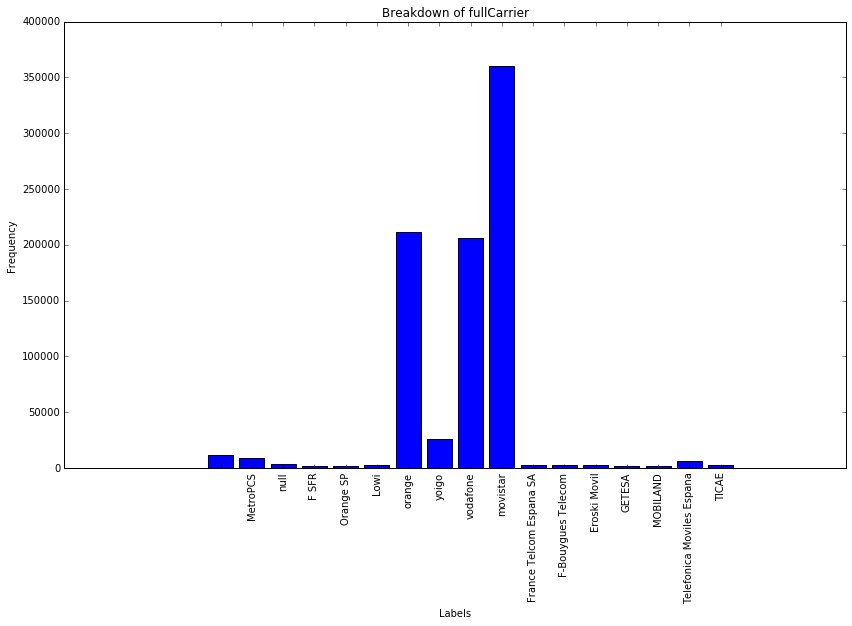

In [22]:
plot_bars(all_data,'fullCarrier', minimum=2000)


In [23]:
print len(all_data)

876770


In [24]:
average_attr(all_data, "speed")

26.65004105980145

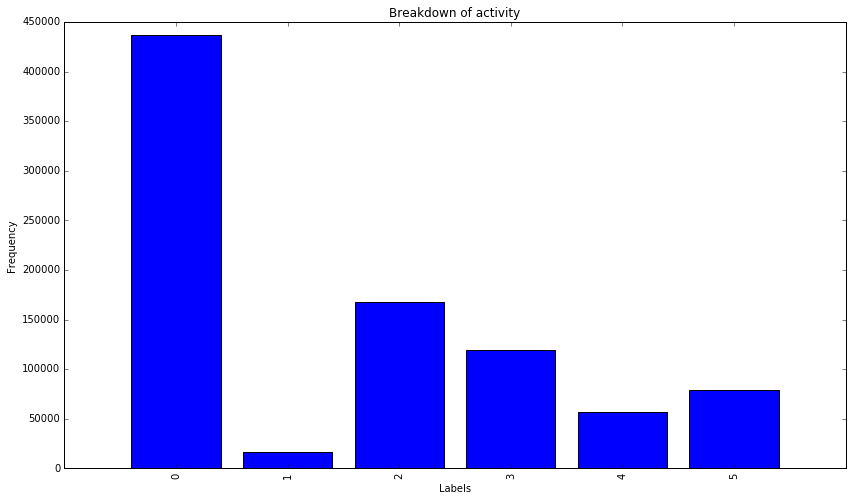

In [25]:
plot_bars(all_data, "activity")

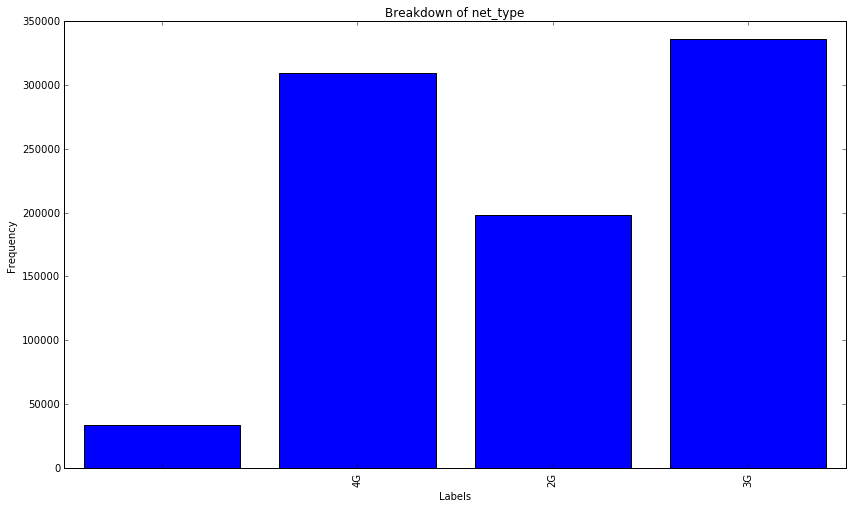

In [26]:
plot_bars(all_data,'net_type')

In [27]:
# plot_bars(list_of_phone_data,'net_type')

In [28]:
# Next is to filter by data/maybe 
# n, bins, patches = plt.hist(all_data, 50, normed=1, facecolor='green', alpha=0.75)

In [29]:
# plt.close()
# plot_hist(list_of_phone_data,'speed')


In [30]:
# print all_data[-1].date

AttributeError: cell_user instance has no attribute 'date'

In [ ]:
# date_datetime = datetime.strptime(all_data[1].date, '%Y-%m-%d %H:%M:%S.%f')
# print date_datetime.timetuple()

In [31]:
# print average_attr(all_data,'datetime')
print datetime.strftime(all_data[-1].datetime,'%S')

22


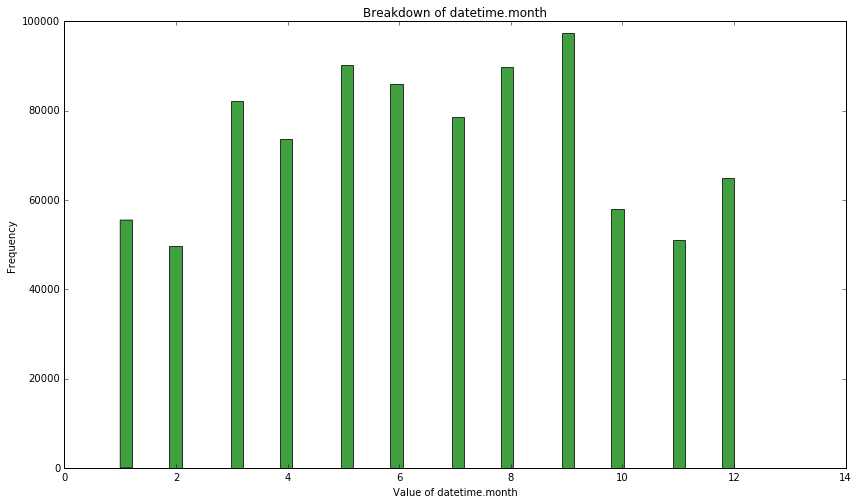

In [32]:
plot_hist(all_data,'datetime.month')

In [33]:
# print all_data[-15000].date

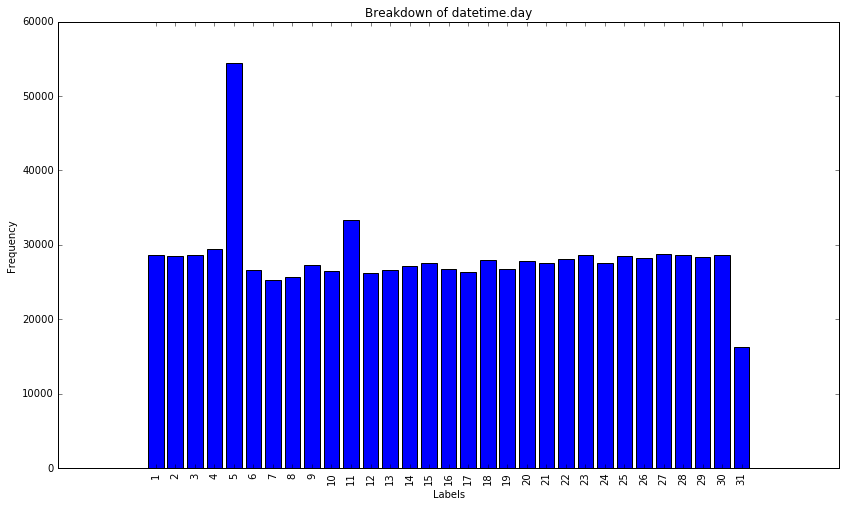

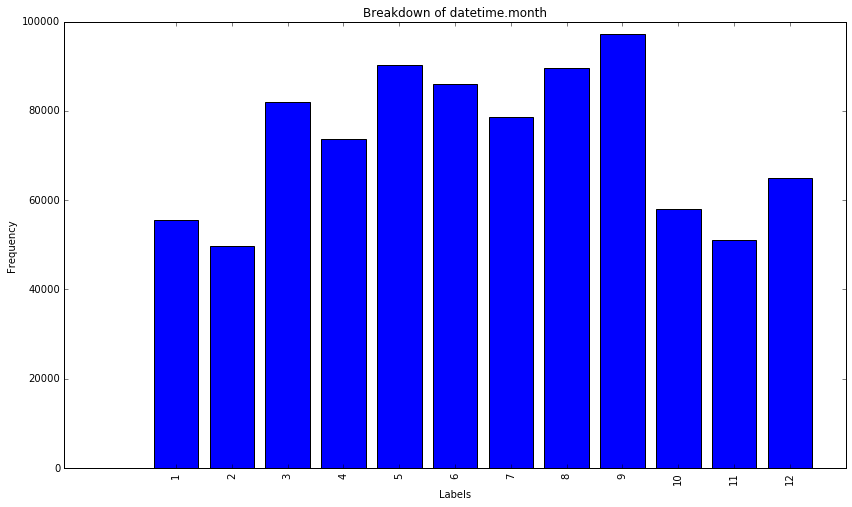

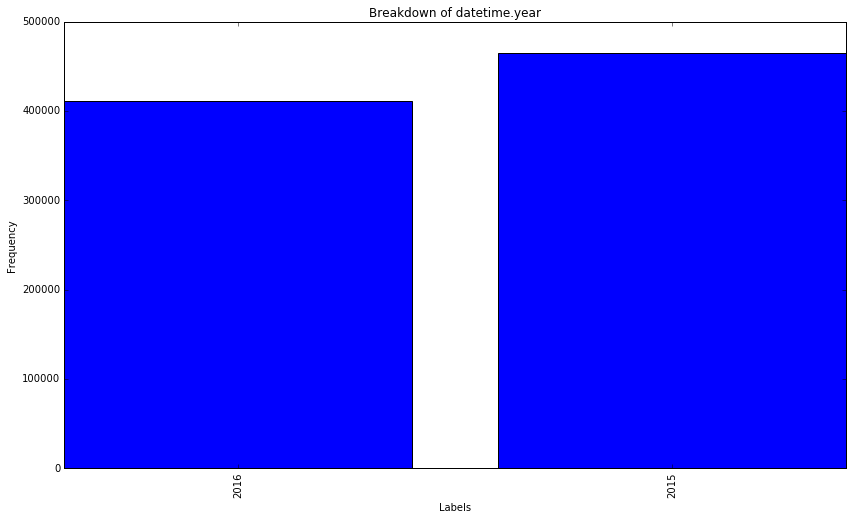

In [34]:
plot_bars(all_data,'datetime.day')
plot_bars(all_data,'datetime.month')
plot_bars(all_data,'datetime.year')



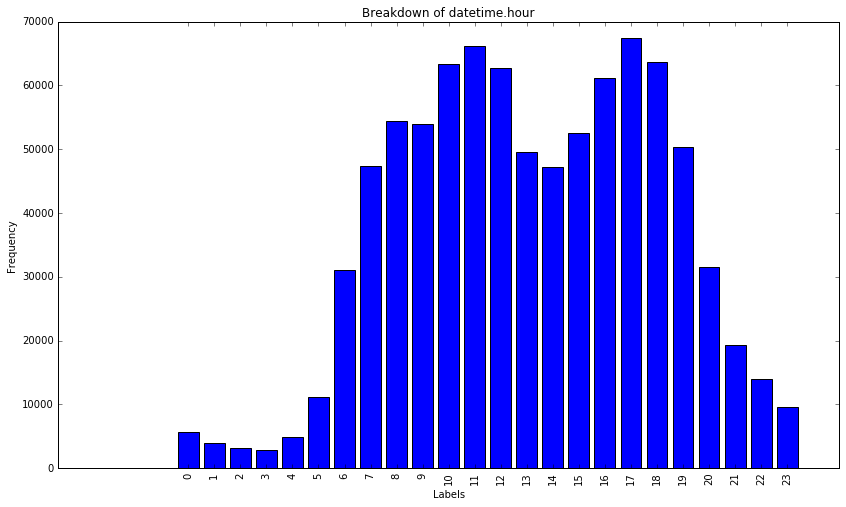

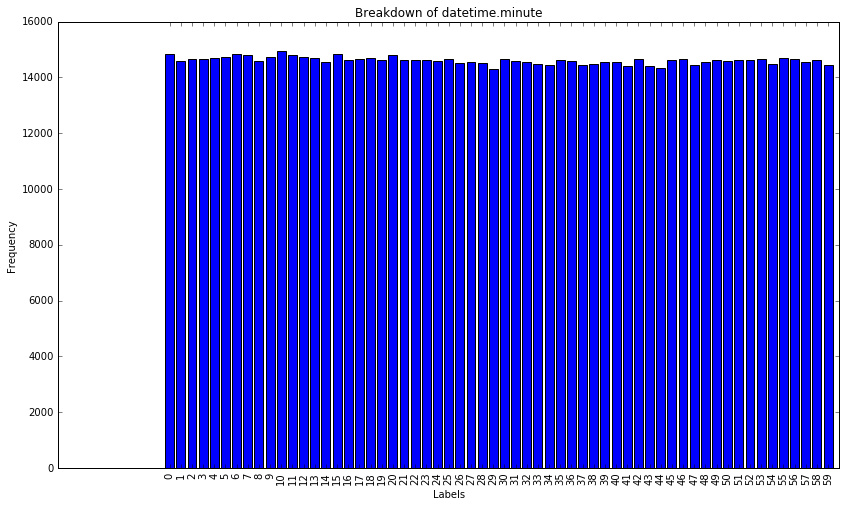

In [35]:
plot_bars(all_data,'datetime.hour')
plot_bars(all_data,'datetime.minute')


In [36]:
print average_attr(all_data,'datetime.hour')

13.1483752866


In [37]:
print 13.0752419387-12

1.0752419387


In [38]:
print average_attr(all_data,'signal_avg')
print average_attr(all_data,'signal_min')
print average_attr(all_data,'signal_max')



13.464852812
10.8160144622
18.0496355943


In [39]:
print average_attr(all_data,'satellites')

5.07524436283


In [41]:
sortedByTime = groupBy(all_data,'datetime.hour')

signal_by_time = {}
for y in sortedByTime.keys():
    signal_by_time[y] = average_attr(sortedByTime[y],'signal_avg')
    print signal_by_time[y]
    
    


13.4373121132
13.4843083103
13.1145135566
13.2107105355
12.937139324
13.1927905308
13.6146685563
13.6927462781
13.6007868804
13.2654927882
13.1827585663
13.2643363621
13.2958306075
13.5232363556
13.5660029264
13.3206493779
13.5819091697
13.6234358068
13.5866909811
13.5846343304
13.4778102747
13.5271750362
13.643386545
13.6045440268


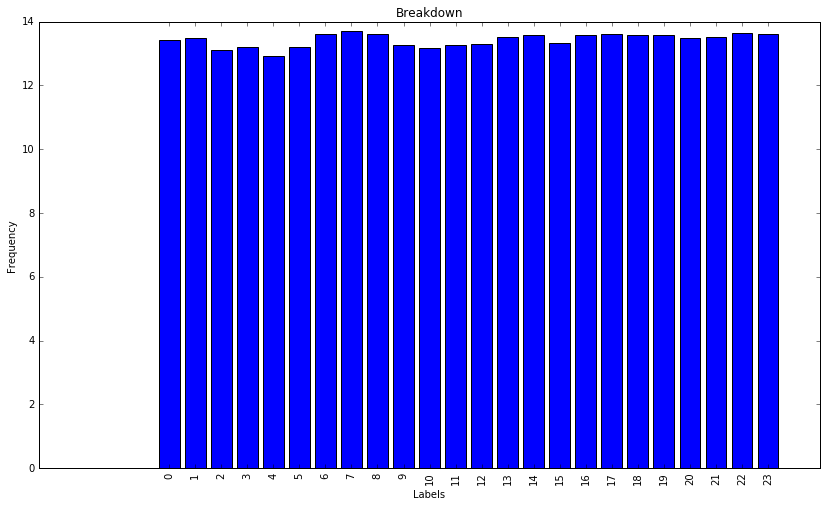

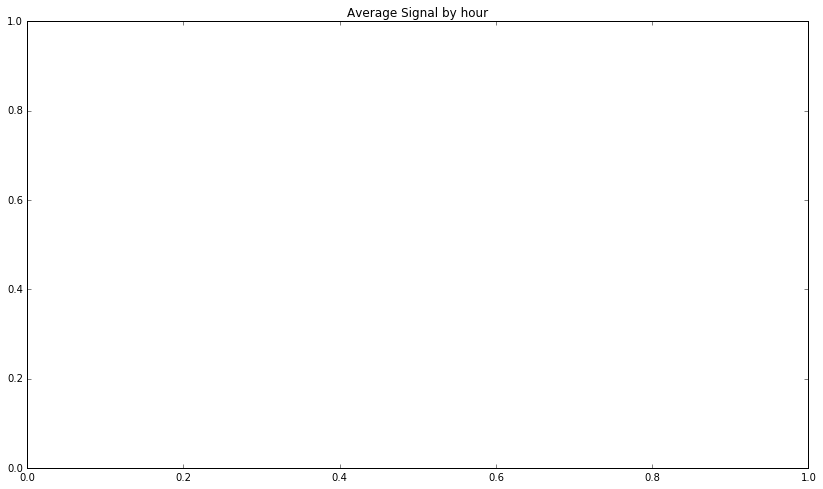

In [49]:

plot_bar(signal_by_time)
# plt.title("Average Signal by hour")

0 average = 1.98832891247
1 average = 2.11197589756
2 average = 2.07336523126
3 average = 2.00560028001
4 average = 1.58800494641
5 average = 1.10231348637
6 average = 1.05926689429
7 average = 1.28753035582
8 average = 1.38514855126
9 average = 1.51434020256
10 average = 1.57106138733
11 average = 1.58170932676
12 average = 1.58073111966
13 average = 1.55313615194
14 average = 1.47757490935
15 average = 1.48785274671
16 average = 1.44726642354
17 average = 1.4866180771
18 average = 1.55260882552
19 average = 1.62922575776
20 average = 1.69354018311
21 average = 1.87115106427
22 average = 1.88440706956
23 average = 1.87257878756


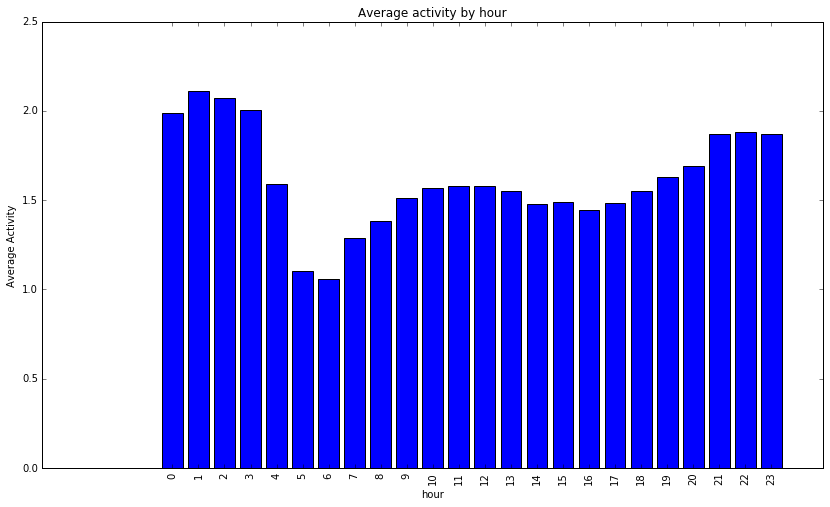

In [53]:
av_activity_by_hour = averageOfDict(sortedByTime,"activity")
# plt.title("Average activity by hour")
plot_bar(av_activity_by_hour,title="Average activity by hour",xlab="hour",ylab="Average Activity")

0 average = 3.66737400531
1 average = 3.73336680894
2 average = 3.42870813397
3 average = 3.5596779839
4 average = 4.40333882935
5 average = 4.88925753228
6 average = 5.12375185209
7 average = 5.37303347059
8 average = 5.22984997794
9 average = 5.19659686349
10 average = 5.21949950329
11 average = 5.23686557912
12 average = 5.18317882274
13 average = 5.13373253493
14 average = 5.15005195411
15 average = 5.18002705741
16 average = 5.22916905163
17 average = 5.13932637642
18 average = 5.05690839635
19 average = 4.93314265284
20 average = 4.74421414039
21 average = 4.39269477165
22 average = 4.14067844926
23 average = 4.06596167941


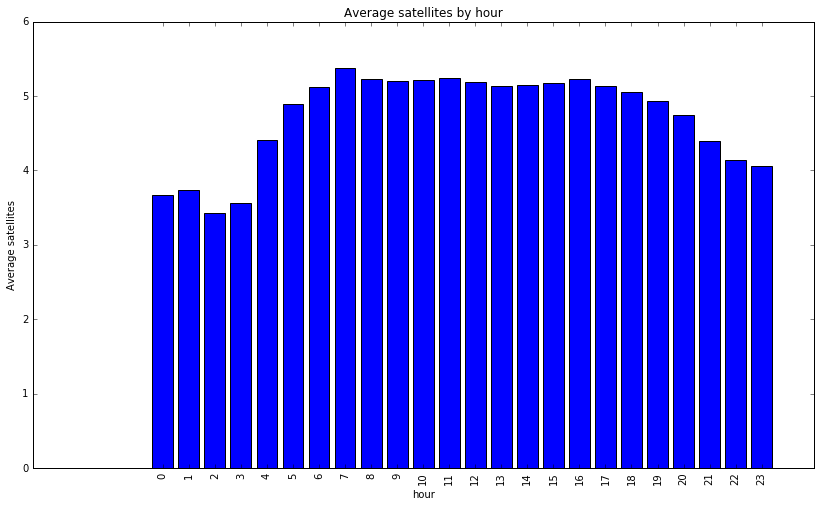

In [56]:
av_satelites_by_hour = averageOfDict(sortedByTime,"satellites")
# plt.title("Average activity by hour")
plot_bar(av_satelites_by_hour,title="Average satellites by hour",xlab="hour",ylab="Average satellites")


0 average = 15.7952254642
1 average = 16.1067034898
2 average = 15.8653907496
3 average = 16.01680084
4 average = 15.4429101401
5 average = 15.3042503587
6 average = 15.4504606068
7 average = 15.6358779432
8 average = 15.5297470216
9 average = 15.5107111778
10 average = 15.5309932668
11 average = 15.6216077287
12 average = 15.537122433
13 average = 15.472932922
14 average = 15.4375172297
15 average = 15.2828452202
16 average = 15.4772270103
17 average = 15.4871376193
18 average = 15.5136690195
19 average = 15.553767926
20 average = 15.5841492879
21 average = 15.5411241992
22 average = 15.5148232611
23 average = 15.7835828709


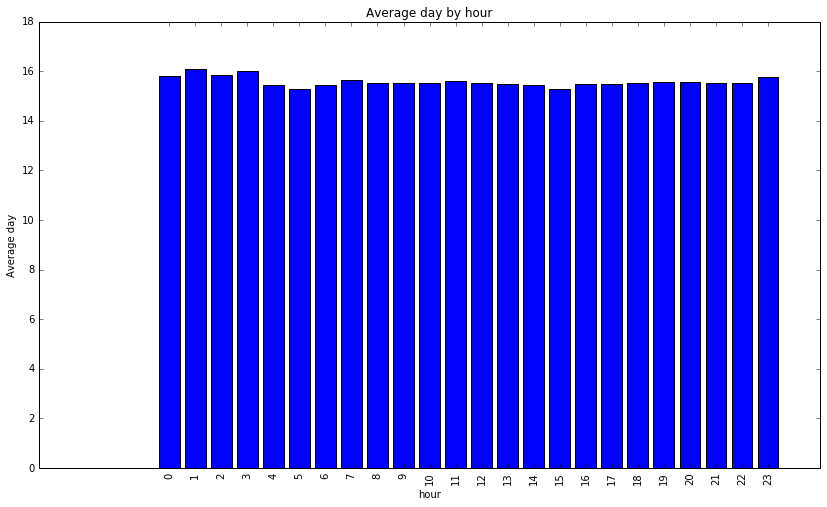

In [55]:
av_day_by_hour = averageOfDict(sortedByTime,"datetime.day")
# plt.title("Average activity by hour")
plot_bar(av_day_by_hour,title="Average day by hour",xlab="hour",ylab="Average day")


0 average = 38.4971730398
1 average = 37.3004703816
2 average = 37.854619496
3 average = 38.5214616626
4 average = 39.9426070095
5 average = 41.1641984541
6 average = 41.2671486304
7 average = 41.4757413139
8 average = 41.4612427738
9 average = 41.4520979461
10 average = 41.3771928402
11 average = 41.2008543046
12 average = 41.0985831183
13 average = 40.9475980667
14 average = 40.9078588222
15 average = 40.9715488213
16 average = 40.9874668592
17 average = 41.0933850451
18 average = 41.1325954747
19 average = 40.9775481947
20 average = 40.6311803214
21 average = 40.0384297629
22 average = 39.7421936388
23 average = 39.685366592


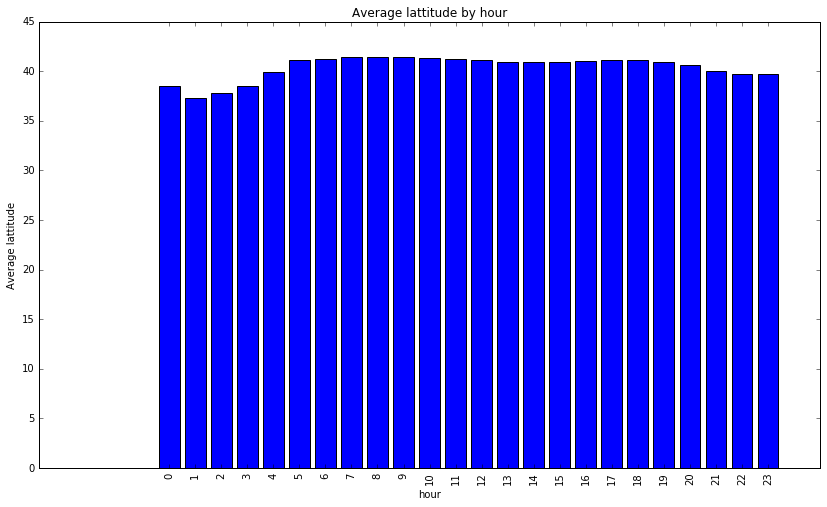

In [57]:
av_lat_by_hour = averageOfDict(sortedByTime,"lat")
# plt.title("Average activity by hour")
plot_bar(av_lat_by_hour,title="Average lattitude by hour",xlab="hour",ylab="Average lattitude")


0 average = -5.90030304686
1 average = -8.96051613608
2 average = -6.59272875279
3 average = -6.68267312566
4 average = -1.14821942086
5 average = 1.42917761478
6 average = 1.74615436063
7 average = 1.95296720241
8 average = 1.89881973378
9 average = 1.79850056046
10 average = 1.51545535456
11 average = 0.867269421556
12 average = 0.547101667119
13 average = 0.267064831751
14 average = 0.0377721263015
15 average = 0.0280943419523
16 average = 0.324887673312
17 average = 0.442017723366
18 average = 0.493550828159
19 average = 0.000439038056649
20 average = -1.30883985504
21 average = -3.22780991527
22 average = -4.18357235034
23 average = -3.59458882002


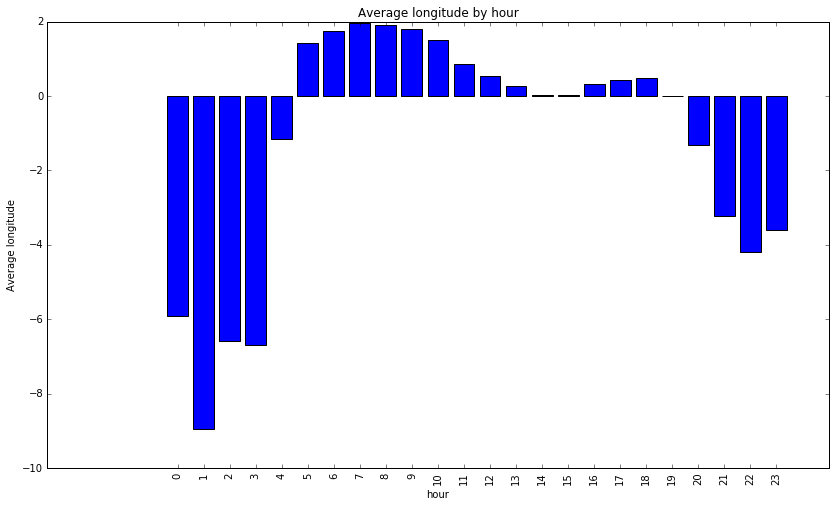

In [59]:
av_long_by_hour = averageOfDict(sortedByTime,"lng")
# plt.title("Average activity by hour")
plot_bar(av_long_by_hour,title="Average longitude by hour",xlab="hour",ylab="Average longitude")
